---
title: "Blur image using GaussianBlur operator"
description: "In this tutorial we show how easily one can apply typical image transformations using Kornia."
author:
    - "Takeshi Teshima"
date: 05-18-2021
categories:
    - Basic
    - Blur
    - kornia.filters
image: "../tutorials/assets/gaussian_blur.png"
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/gaussian_blur.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

Preparation
---------------

We first install Kornia.

In [ ]:
%%capture
%matplotlib inline
!pip install kornia
!pip install kornia-rs

In [ ]:
import kornia

kornia.__version__

'0.6.12'

Now we download the example image.

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/bennett_aden.png"
download_image(url)

'bennett_aden.png'

Example
-----------

We first import the required libraries and load the data.

In [ ]:
import matplotlib.pyplot as plt
import torch

# read the image with kornia
data = kornia.io.load_image("./bennett_aden.png", kornia.io.ImageLoadType.RGB32)[None, ...]  # BxCxHxW

To apply a filter, we create the Gaussian Blur filter object and apply it to the data:

In [ ]:
# create the operator
gauss = kornia.filters.GaussianBlur2d((11, 11), (10.5, 10.5))

# blur the image
x_blur: torch.tensor = gauss(data)

That's it! We can compare the pre-transform image and the post-transform image:

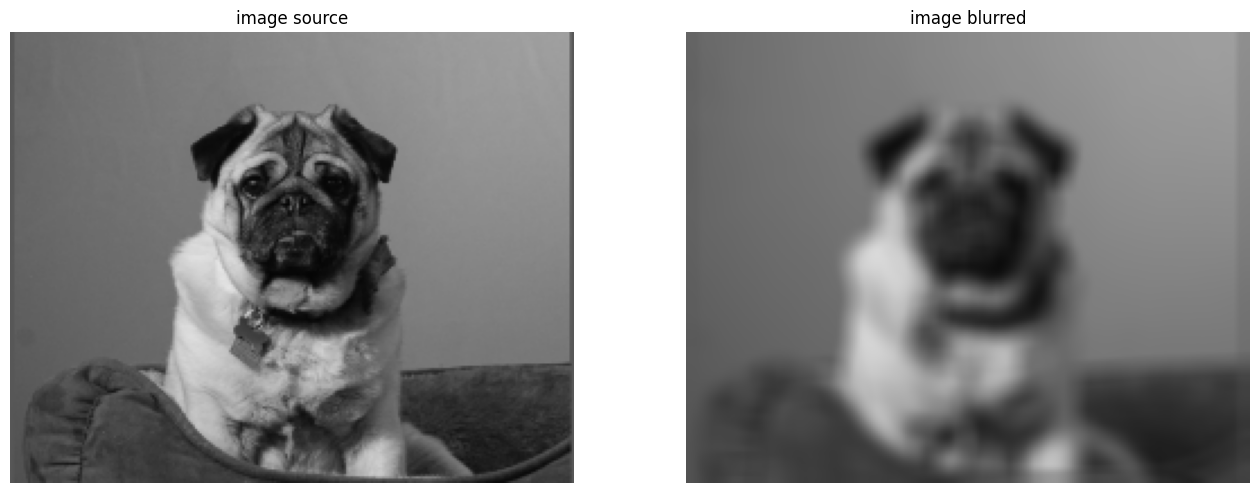

In [ ]:
# convert back to numpy
img_blur = kornia.tensor_to_image(x_blur)

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis("off")
axs[0].set_title("image source")
axs[0].imshow(kornia.tensor_to_image(data))

axs[1].axis("off")
axs[1].set_title("image blurred")
axs[1].imshow(img_blur)

pass